**Importing Libraries and Loading Datasets**

We start by importing essential libraries and loading the necessary datasets into a dictionary to organize them for easy access in the analysis.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### **Datasets Overview**

olist_customers_dataset.csv

Contains details on customers who placed orders.
Key Columns:
customer_id: Unique customer identifier.
customer_unique_id: Unique identifier for each customer (used to join with other datasets).
customer_city, customer_state: Customer location details.

olist_orders_dataset.csv

Includes order tracking data, essential for understanding customer behavior through the product funnel.
Key Columns:
order_id, customer_id: Unique identifiers for each order and customer.
order_status: Order status (e.g., delivered, shipped).
order_purchase_timestamp: Date and time of order placement.

olist_order_items_dataset.csv

Details on individual items within each order.
Key Columns:
order_id: Order identifier (for joining with orders dataset).
product_id: Identifier for the purchased product.
price: Price of each item.

olist_order_payments_dataset.csv

Contains information on payment transactions.
Key Columns:
order_id: Links to the orders dataset.
payment_type: Type of payment (e.g., credit card).
payment_value: Amount paid.

olist_order_reviews_dataset.csv

Holds customer reviews and ratings for completed orders.
Key Columns:
order_id: Connects with the orders dataset.
review_score: Customer rating (from 1 to 5).
review_comment_message: Review comments.

olist_products_dataset.csv

Contains product information, including category and description.
Key Columns:
product_id: Unique identifier for each product.
product_category_name: Name of the product category.
product_weight_g, product_length_cm: Product dimensions.

olist_sellers_dataset.csv

Information about sellers on the platform.
Key Columns:
seller_id: Unique seller identifier.
seller_city, seller_state: Seller location details.

olist_geolocation_dataset.csv

Contains geographic data (latitude and longitude) for cities and states in Brazil.
Key Columns:
geolocation_zip_code_prefix: Location zip code.
geolocation_lat, geolocation_lng: Coordinates for mapping purposes.

olist_marketing_qualified_leads_dataset.csv

Data on marketing-qualified leads interested in selling through Olist.
Key Columns:
mql_id: Identifier for each lead.
origin: Source channel (e.g., organic, referral).
first_contact_date: Date of initial interaction.

olist_closed_deals_dataset.csv

Data on leads that converted into closed deals.
Key Columns:
mql_id: Identifier for linking with MQL dataset.
won_date: Date of deal closure.
business_type: Business category (e.g., B2B, B2C).

olist_products_category_name_translation.csv

Translations for product category names.
Key Columns:
product_category_name: Product category in Portuguese.
product_category_name_english: Translated category name.

### SOURCE: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [2]:
mql = pd.read_csv("/content/olist_marketing_qualified_leads_dataset.csv")
deals = pd.read_csv("/content/olist_closed_deals_dataset.csv")
orders = pd.read_csv("/content/olist_orders_dataset.csv")
order_items = pd.read_csv("/content/olist_order_items_dataset.csv")
order_payments = pd.read_csv("/content/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/olist_order_reviews_dataset.csv")
products = pd.read_csv("/content/olist_products_dataset.csv")
sellers = pd.read_csv("/content/olist_sellers_dataset.csv")
geolocation = pd.read_csv("/content/olist_geolocation_dataset.csv")
product_category_name_translation = pd.read_csv("/content/product_category_name_translation.csv")
customers = pd.read_csv("/content/olist_customers_dataset.csv")

datasets = {
    'mql': pd.read_csv("/content/olist_marketing_qualified_leads_dataset.csv"),
    'deals': pd.read_csv("/content/olist_closed_deals_dataset.csv"),
    'orders': pd.read_csv("/content/olist_orders_dataset.csv"),
    'geolocation': pd.read_csv("/content/olist_geolocation_dataset.csv"),
    'product_category_translation': pd.read_csv("/content/product_category_name_translation.csv"),
    'customers': pd.read_csv("/content/olist_customers_dataset.csv"),
    'sellers': pd.read_csv("/content/olist_sellers_dataset.csv"),
    'order_items': pd.read_csv("/content/olist_order_items_dataset.csv"),
    'order_payments': pd.read_csv("/content/olist_order_payments_dataset.csv"),
    'order_reviews': pd.read_csv("/content/olist_order_reviews_dataset.csv"),
    'products': pd.read_csv("/content/olist_products_dataset.csv")
}

I merged the mql , deals and sellers datasets
and Secondly i merged the orders and review dataset

In [3]:
merged_data = pd.merge(orders, order_items, on='order_id', how='left')
merged_data = pd.merge(merged_data, order_reviews[['order_id', 'review_id', 'review_score', 'review_creation_date']], on='order_id', how='left')
merged_data1 = pd.merge(mql, deals, on='mql_id', how='left')
merged_data1 = pd.merge(merged_data1, datasets['sellers'], on='seller_id', how='left')
merged_payments_data = pd.merge(orders, order_payments, on='order_id', how='inner')
merged_payments_data['order_purchase_timestamp'] = pd.to_datetime(merged_payments_data['order_purchase_timestamp'])
merged_payments_data['order_approved_at'] = pd.to_datetime(merged_payments_data['order_approved_at'])
merged_payments_data['conversion_time'] = (merged_payments_data['order_approved_at'] - merged_payments_data['order_purchase_timestamp']).dt.days
print("Columns in merged_data1:", merged_data1.columns)
print("Columns in merged_data:", merged_data.columns)

Columns in merged_data1: Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'seller_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'has_company', 'has_gtin',
       'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')
Columns in merged_data: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'review_id', 'review_score',
       'review_creation_date'],
      dtype='object')


###Visualizing Lead Origin Distribution

The distribution of lead origin types within the mql dataset.




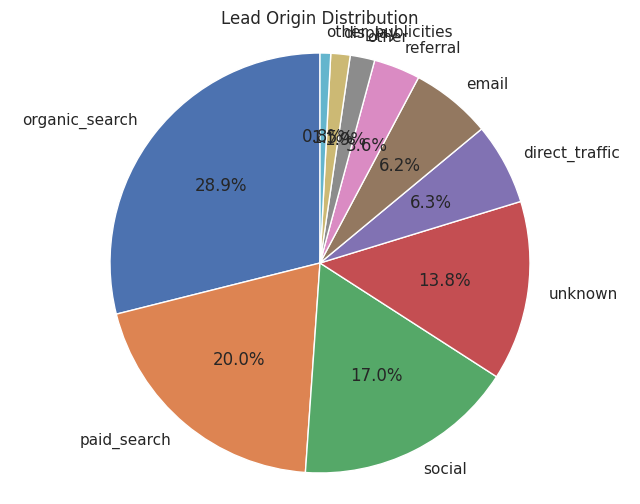

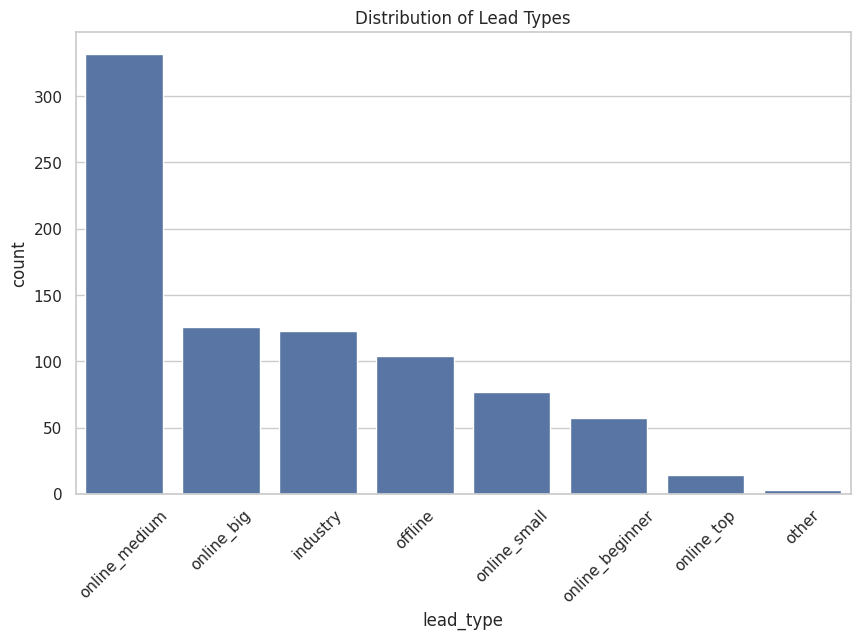

In [4]:
plt.figure(figsize=(8, 6))
origin_counts = mql['origin'].value_counts()
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Lead Origin Distribution")
plt.axis('equal')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=deals, x='lead_type', order=deals['lead_type'].value_counts().index)
plt.title("Distribution of Lead Types")
plt.xticks(rotation=45)
plt.show()




In [5]:
lead_origin_counts = merged_data1['origin'].value_counts()
print("\nLead Origin Counts:")
print(lead_origin_counts)


Lead Origin Counts:
origin
organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: count, dtype: int64


### Lead Origin and Conversion Status

After merging mql and deals datasets, this code block checks the origin of leads and calculates conversion status (converted vs. not converted)

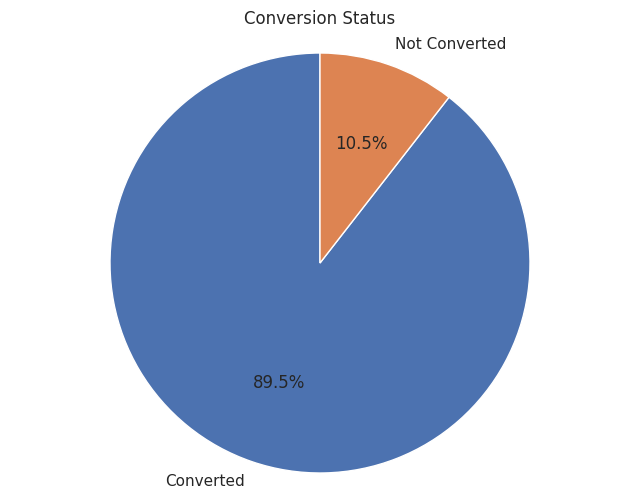

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(
    merged_data1['won_date'].notna().value_counts(),
    labels=['Converted', 'Not Converted'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Conversion Status")
plt.axis('equal')
plt.show()

### **Here’s what I’m doing with this set of code snippets:**

First, I visualize the distribution of lead origins in the MQL dataset to see the primary sources of leads.

Then, I analyze the lead types in the Deals dataset to understand which types are most common in closed deals.

Next, I examine the distribution of order statuses in the Orders dataset to assess the stages or outcomes of orders.

I also look at product categories in the Products dataset to see which categories are most prevalent.

For the Order Payments dataset, I plot the payment types to identify the most frequently used payment methods.

Lastly, I visualize review scores from the Order Reviews dataset to get an overview of customer satisfaction.

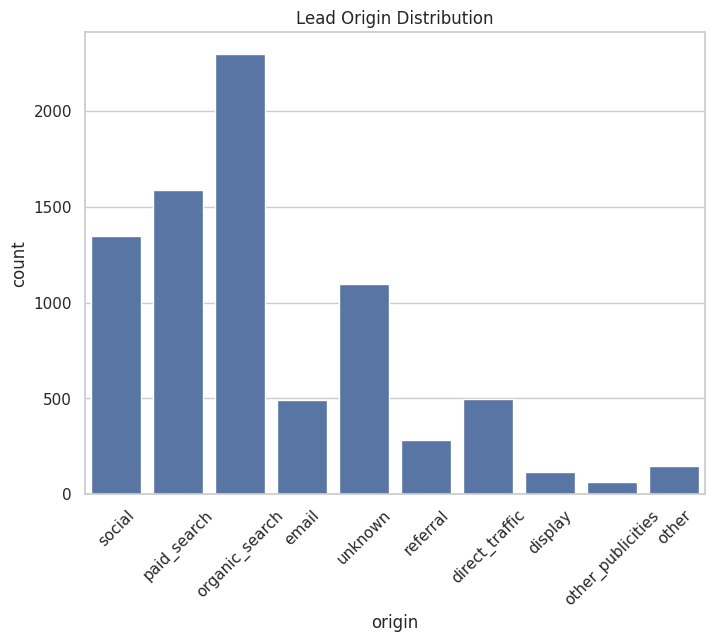

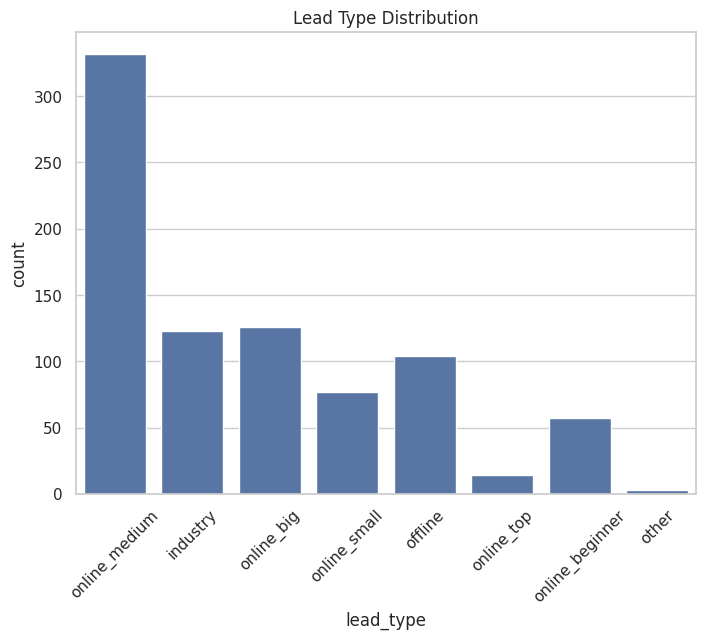

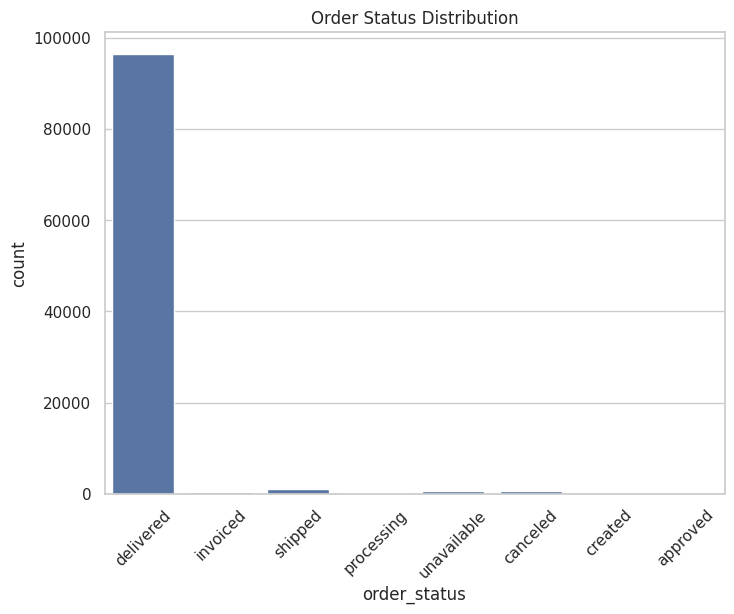

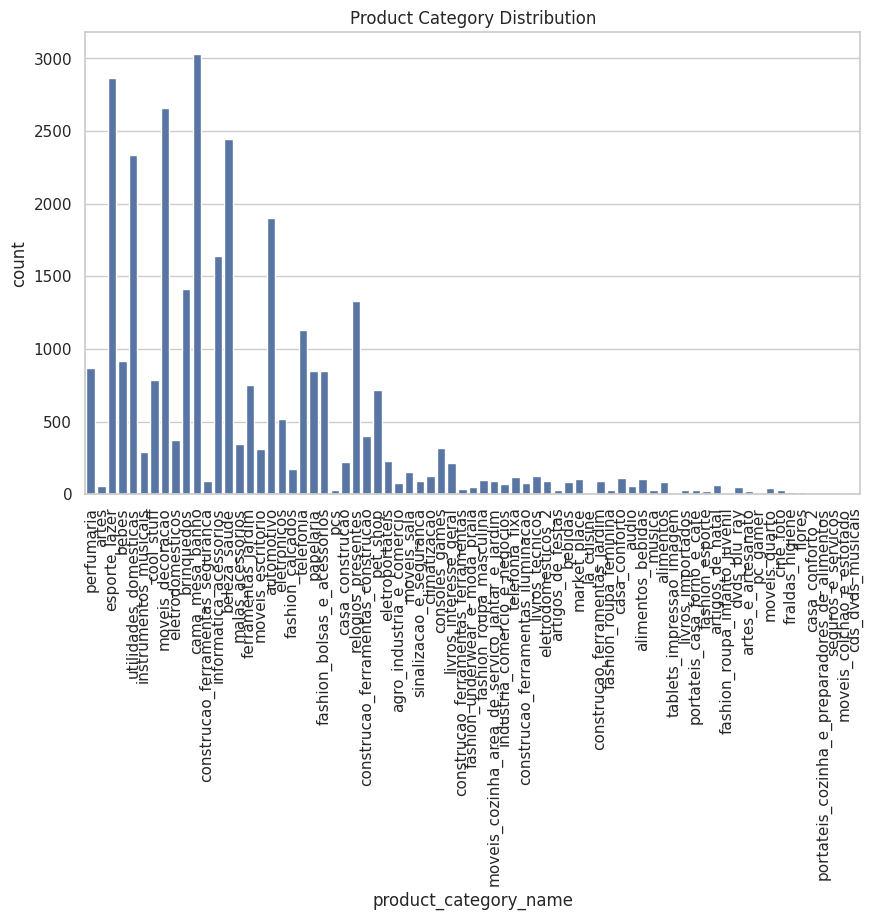

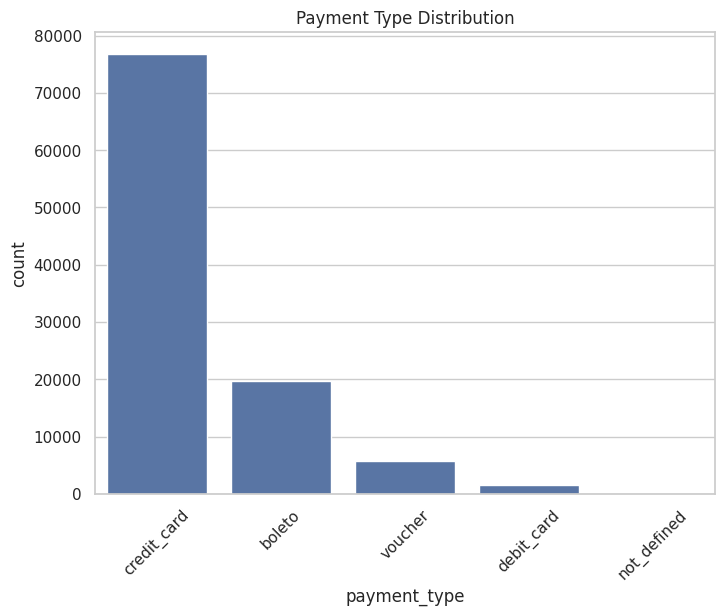

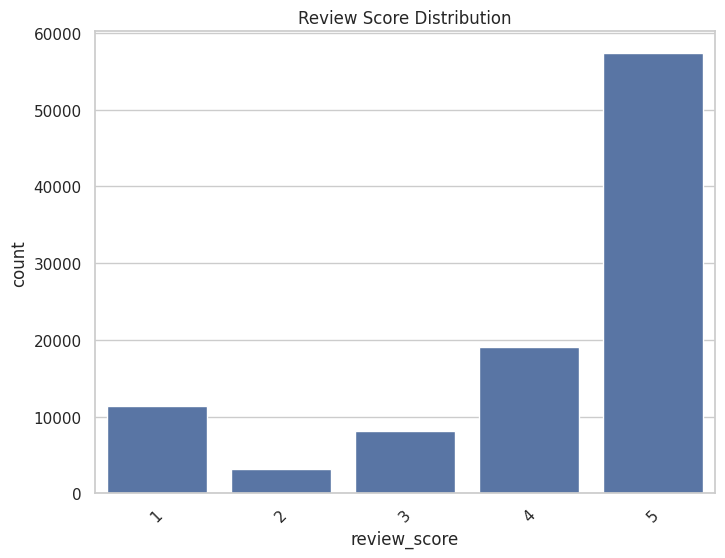

In [7]:
# Visualizing the distribution of the origin in MQL dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=datasets['mql'], x='origin')
plt.title("Lead Origin Distribution")
plt.xticks(rotation=45)
plt.show()

# Visualizing the distribution of lead types in Deals dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=datasets['deals'], x='lead_type')
plt.title("Lead Type Distribution")
plt.xticks(rotation=45)
plt.show()

# Visualizing the distribution of order statuses in Orders dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=datasets['orders'], x='order_status')
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.show()

# Visualizing the product categories in the Products dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=datasets['products'], x='product_category_name')
plt.title("Product Category Distribution")
plt.xticks(rotation=90)
plt.show()

# Visualizing payment types in Order Payments dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=datasets['order_payments'], x='payment_type')
plt.title("Payment Type Distribution")
plt.xticks(rotation=45)
plt.show()

# Visualizing ratings in Order Reviews dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=datasets['order_reviews'], x='review_score')
plt.title("Review Score Distribution")
plt.xticks(rotation=45)
plt.show()



### Average Time in Funnel Stage (MQL to Conversion)

Here, I analyzed and visualized the average time leads spend in each stage from MQL to conversion, broken down by lead type and business segment.
Showed the number of leads by lead_type and business_segment.
and Displayed the average time to conversion (in days) for the same breakdown.

<ipython-input-8-93f09ff6e53d>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_data1['won_date'] = pd.to_datetime(merged_data1['won_date'])


      lead_type         business_segment  total_leads  \
0      industry  audio_video_electronics            6   
1      industry           bags_backpacks            2   
2      industry           bed_bath_table            3   
3      industry                    books            1   
4      industry          car_accessories           10   
..          ...                      ...          ...   
153  online_top               home_decor            1   
154  online_top      household_utilities            2   
155  online_top                      pet            2   
156  online_top                  watches            1   
157       other                    other            3   

     avg_conversion_time_days  conversion_time_std_days  
0                   35.500000                 45.346444  
1                   30.500000                 38.890873  
2                   18.000000                 20.952327  
3                   17.000000                       NaN  
4                   16.20

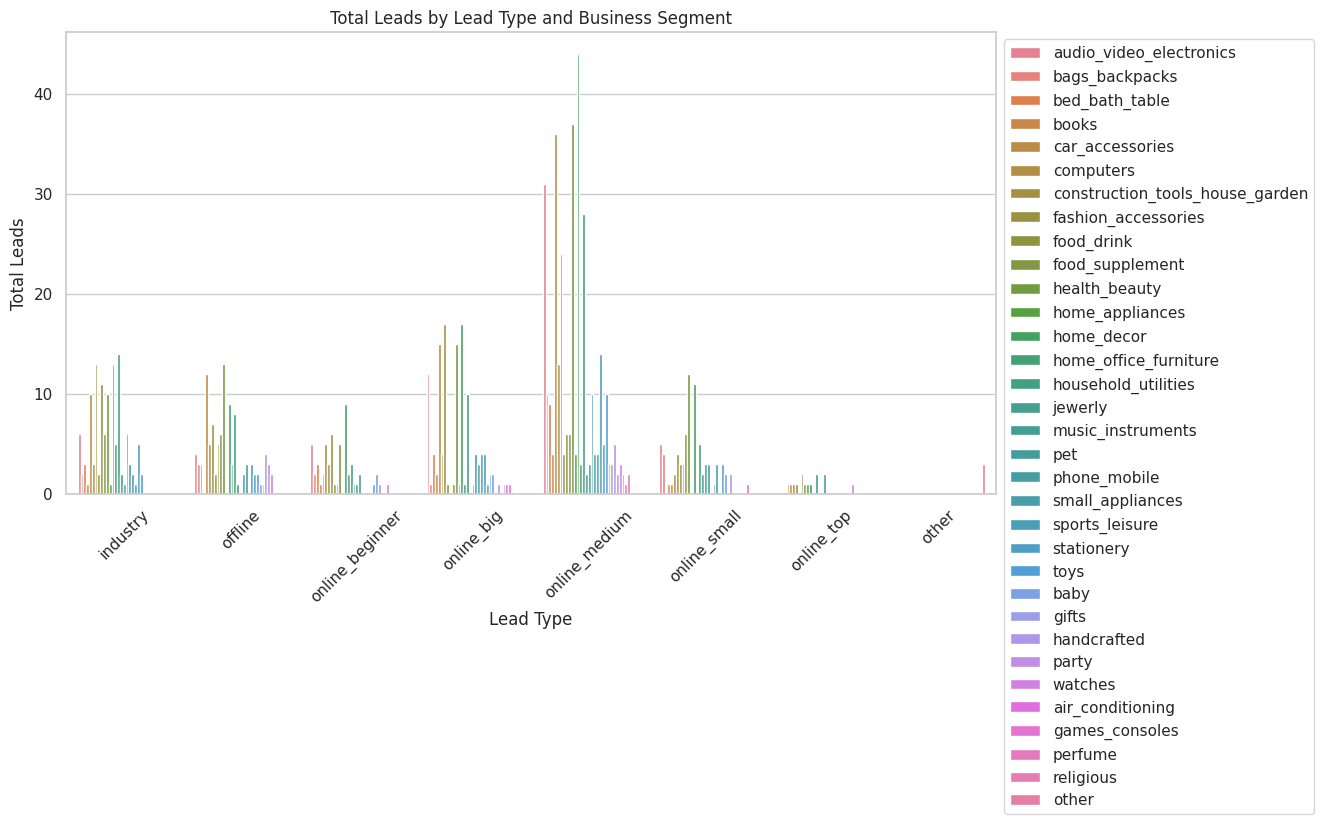

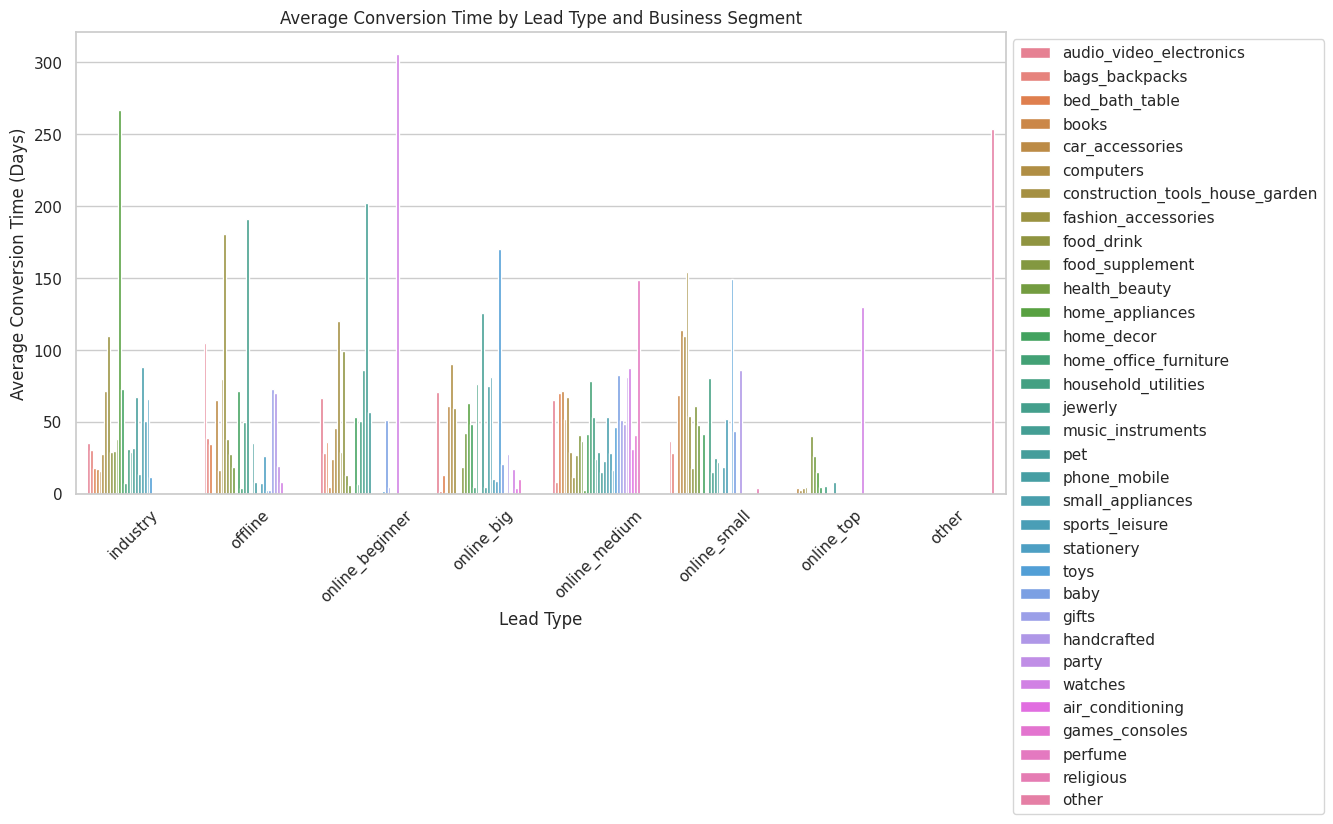

In [8]:
merged_data1['first_contact_date'] = pd.to_datetime(merged_data1['first_contact_date'])
merged_data1['won_date'] = pd.to_datetime(merged_data1['won_date'])

# Calculate the duration from MQL to conversion in days
merged_data1['conversion_time_days'] = (
    merged_data1['won_date'] - merged_data1['first_contact_date']
).dt.days

# Grouping by lead type and business segment to calculate average and std deviation
funnel_performance = (
    merged_data1.groupby(['lead_type', 'business_segment'])['conversion_time_days']
    .agg(['count', 'mean', 'std'])
    .reset_index()
)

# Renaming columns for clarity
funnel_performance.columns = [
    'lead_type', 'business_segment', 'total_leads', 'avg_conversion_time_days', 'conversion_time_std_days'
]
print(funnel_performance)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=funnel_performance,
    x='lead_type',
    y='total_leads',
    hue='business_segment'
)
plt.title("Total Leads by Lead Type and Business Segment")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Lead Type')
plt.ylabel('Total Leads')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=funnel_performance,
    x='lead_type',
    y='avg_conversion_time_days',
    hue='business_segment'
)
plt.title("Average Conversion Time by Lead Type and Business Segment")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Lead Type')
plt.ylabel('Average Conversion Time (Days)')
plt.show()

### leads by origin

 I visualized the lead totals by origin,First, I merged the Sellers dataset to add seller information by seller_id, then grouped the data by business_type and origin to get lead counts. After filtering for manufacturers

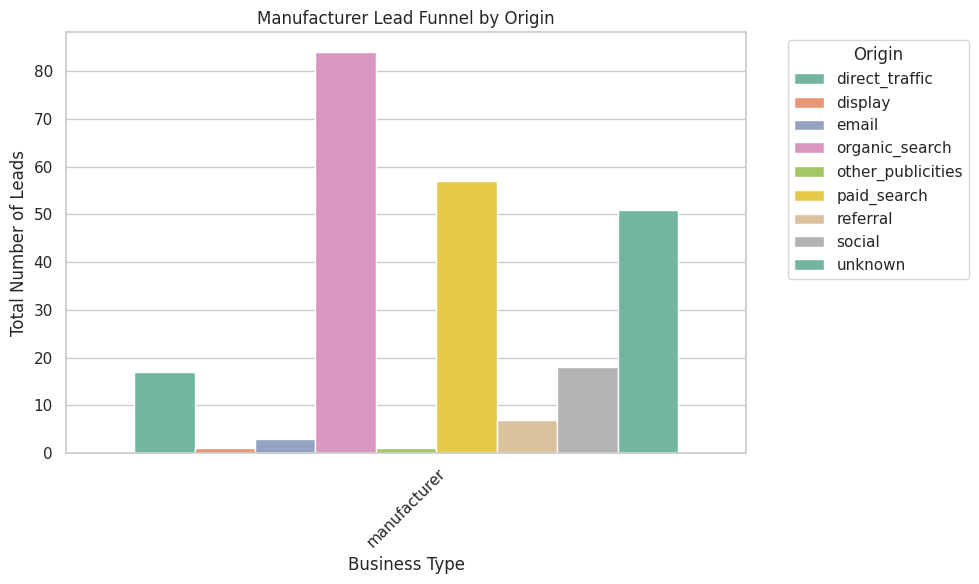

In [9]:
avgconversion = merged_data1.groupby(['business_type', 'origin']).size().reset_index(name='totals')
manufacturer = avgconversion[avgconversion['business_type'] == 'manufacturer']
plt.figure(figsize=(10, 6))
sns.barplot(data=manufacturer, x='business_type', y='totals', hue='origin', palette='Set2', dodge=True)
plt.title("Manufacturer Lead Funnel by Origin")
plt.xlabel('Business Type')
plt.ylabel('Total Number of Leads')
plt.xticks(rotation=45)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Average Sales Conversion Time by Business Type

calculated the average time taken to convert leads based on business type and visualized it

      lead_type         business_segment lead_behaviour_profile  \
0      industry  audio_video_electronics                    cat   
1      industry  audio_video_electronics                  eagle   
2      industry  audio_video_electronics                   wolf   
3      industry           bags_backpacks                    cat   
4      industry           bags_backpacks                   wolf   
..          ...                      ...                    ...   
286  online_top      household_utilities                    cat   
287  online_top      household_utilities                  shark   
288  online_top                      pet                    cat   
289       other                    other                    cat   
290       other                    other            eagle, wolf   

     avg_time_to_conversion  
0                      22.0  
1                       1.0  
2                      20.0  
3                       3.0  
4                      58.0  
..             

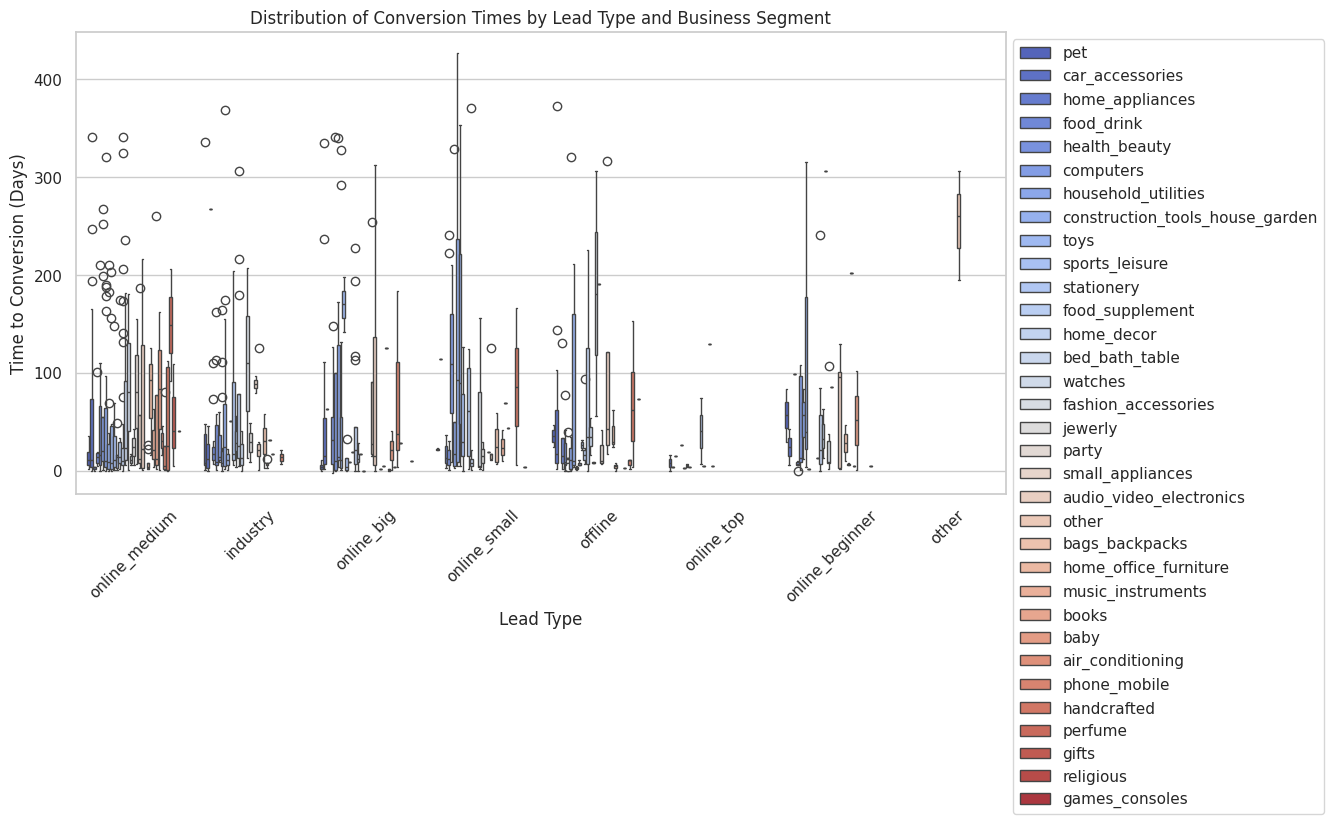

In [10]:
merged_data1['first_contact_date'] = pd.to_datetime(merged_data1['first_contact_date'])
merged_data1['won_date'] = pd.to_datetime(merged_data1['won_date'])

merged_data1['conversion_time'] = (
    merged_data1['won_date'] - merged_data1['first_contact_date']
).dt.days

merged_data1 = merged_data1[merged_data1['conversion_time'].notna()]

avg_stage_time = (
    merged_data1.groupby(['lead_type', 'business_segment', 'lead_behaviour_profile'])['conversion_time']
    .mean()
    .reset_index()
)
avg_stage_time.rename(columns={'conversion_time': 'avg_time_to_conversion'}, inplace=True)
print(avg_stage_time)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=merged_data1,
    x='lead_type',
    y='conversion_time',
    hue='business_segment',
    palette='coolwarm'
)
plt.title("Distribution of Conversion Times by Lead Type and Business Segment")
plt.xlabel('Lead Type')
plt.ylabel('Time to Conversion (Days)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Segmented Analysis by Lead Type, Business Segment, and Behavior Profile

This bar chart presents the average conversion time by lead behavior profile, lead type, and business segment for a more segmented analysis of funnel performance.

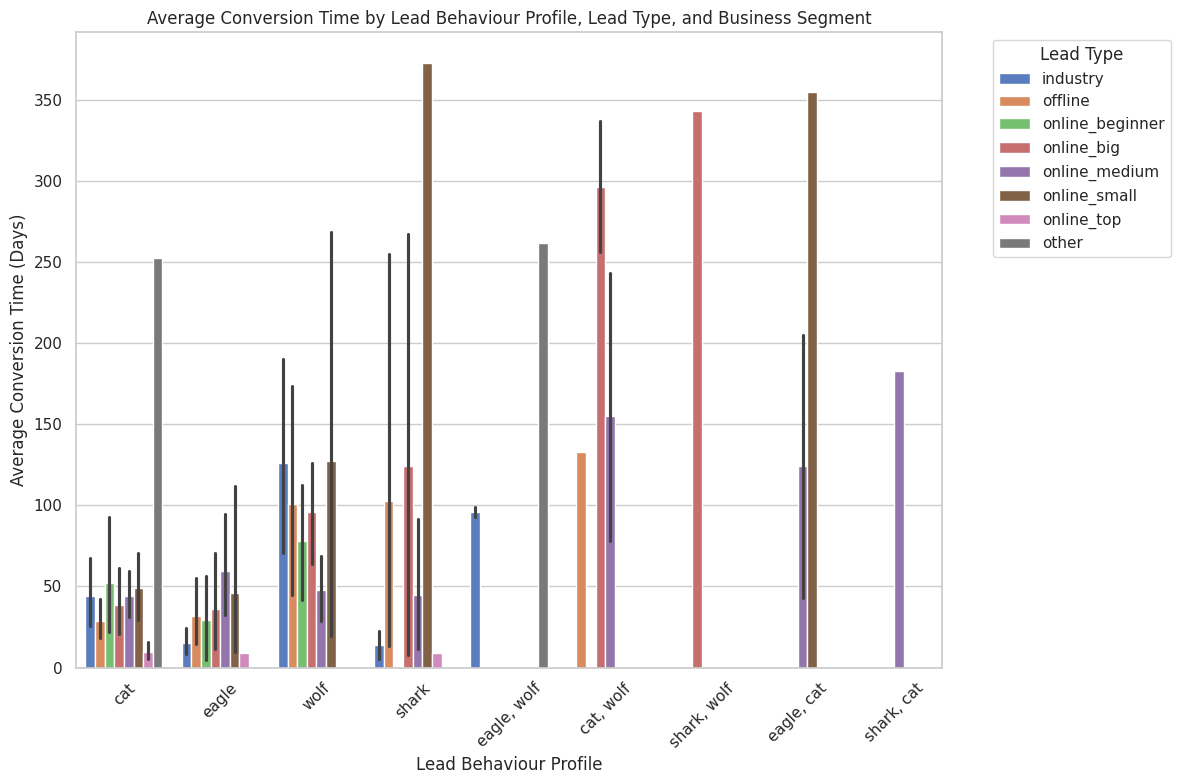

In [11]:
merged_data1['mql_to_conversion_time'] = merged_data1['conversion_time'] - merged_data1['conversion_time'].min()
segmented_analysis = merged_data1.groupby(['lead_type', 'business_segment', 'lead_behaviour_profile'])['mql_to_conversion_time'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=segmented_analysis, x='lead_behaviour_profile', y='mql_to_conversion_time', hue='lead_type', palette='muted')
plt.title("Average Conversion Time by Lead Behaviour Profile, Lead Type, and Business Segment")
plt.xlabel('Lead Behaviour Profile')
plt.ylabel('Average Conversion Time (Days)')
plt.xticks(rotation=45)
plt.legend(title='Lead Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Top 5 sellers with the fastest close times

I converted first_contact_date and won_date to datetime format, then calculated the close_time_days for each seller. After calculating the average close time per seller, I identified the top 5 sellers with the fastest close times along with the overall average close time for all sellers.

In [12]:
merged_data1['first_contact_date'] = pd.to_datetime(merged_data1['first_contact_date'])
merged_data1['won_date'] = pd.to_datetime(merged_data1['won_date'])
merged_data1['close_time_days'] = (merged_data1['won_date'] - merged_data1['first_contact_date']).dt.days
average_close_time_per_seller = merged_data1.groupby('seller_id')['close_time_days'].mean().reset_index()
average_close_time_per_seller.columns = ['seller_id', 'avg_close_time_days']
average_close_time_per_seller = average_close_time_per_seller.sort_values(by='avg_close_time_days')
top_sellers = average_close_time_per_seller.head(5)['seller_id']
print("Top 5 Sellers with Fastest Average Close Time:")
print(top_sellers)
overall_avg_close_time = average_close_time_per_seller['avg_close_time_days'].mean()
print(f"Average close time among all sellers = {overall_avg_close_time:.2f} days")


Top 5 Sellers with Fastest Average Close Time:
289    5e063e85d44b0f5c3e6ec3131103a57e
61     138dbe45fc62f1e244378131a6801526
642    c092292535a57dacd95a8765f5518f87
391    7aa286758114fcd93df587a1e23301ed
72     184725737946a1a938bbbd1a9e978103
Name: seller_id, dtype: object
Average close time among all sellers = 48.44 days


### lead funnel for resellers

I grouped the data by business_type and origin, calculating the total number of leads for each combination. Then, I filtered for reseller business type and visualized the lead funnel for resellers , displaying the total deals closed by origin.

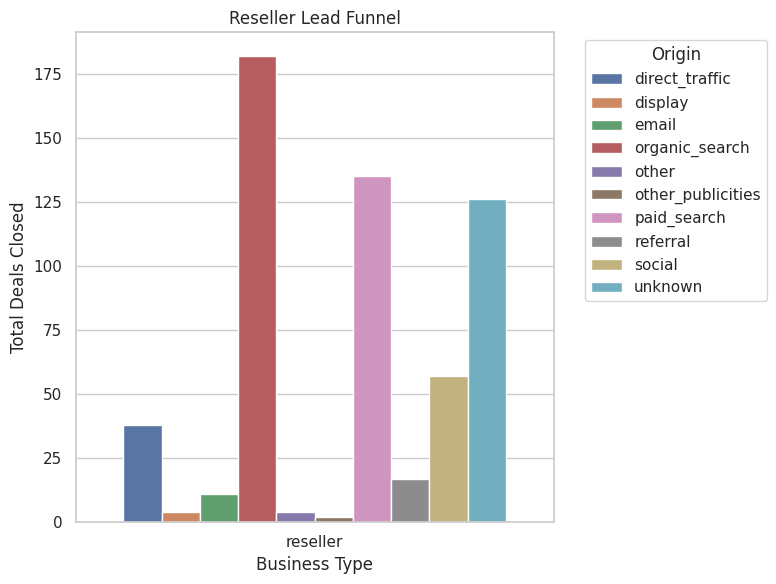

In [13]:
avg_conversion = merged_data1.groupby(['business_type', 'origin']).size().reset_index(name='totals')
reseller_data = avg_conversion[avg_conversion['business_type'] == 'reseller']
plt.figure(figsize=(8, 6))
sns.barplot(data=reseller_data, x='business_type', y='totals', hue='origin', dodge=True)
plt.title("Reseller Lead Funnel")
plt.xlabel("Business Type")
plt.ylabel("Total Deals Closed")
plt.legend(title="Origin", bbox_to_anchor=(1.05, 1), loc='best')
plt.tight_layout()
plt.show()


### Number of unique sellers in each city

visualized the top 10 cities with the highest number of sellers

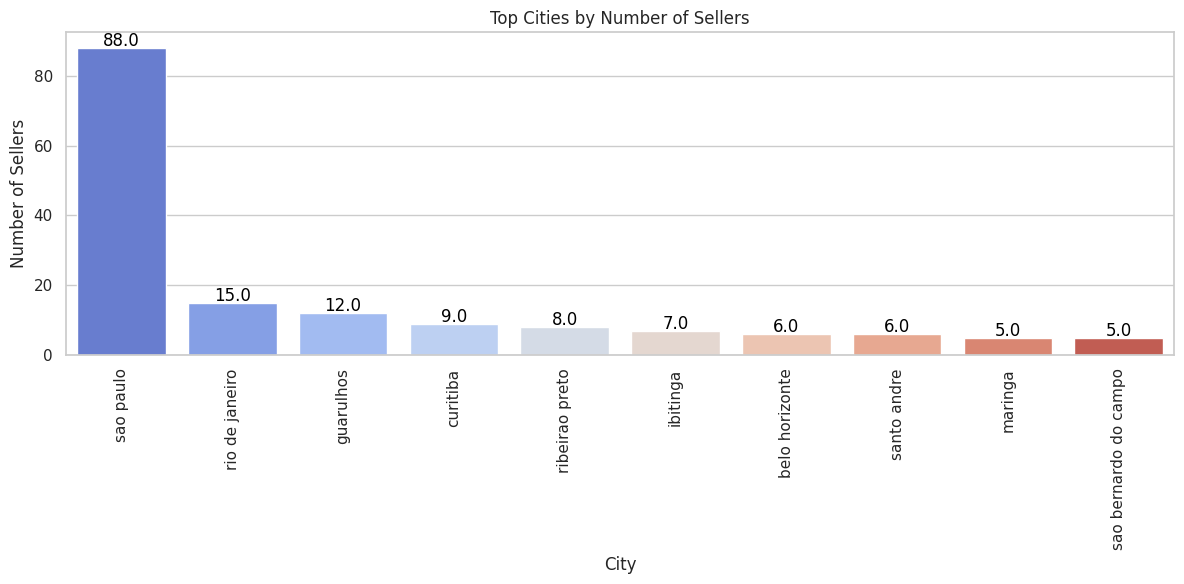

In [14]:
city_seller_count = merged_data1.groupby('seller_city')['seller_id'].nunique().reset_index()
city_seller_count.rename(columns={'seller_id': 'seller_count'}, inplace=True)
city_seller_count = city_seller_count.sort_values('seller_count', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_city', y='seller_count', data=city_seller_count.head(10), hue='seller_city', palette='coolwarm', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Sellers")
plt.title("Top Cities by Number of Sellers")
plt.tight_layout()
plt.show()

### Distribution of Review Scores

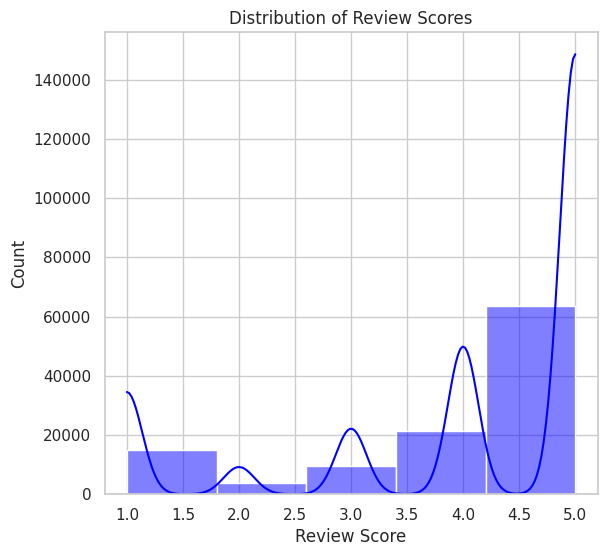

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['review_score'], bins=5, kde=True, color='blue')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

### Average conversion_time for each payment method



In [16]:
merged_payments_data = pd.merge(orders, order_payments, on='order_id', how='inner')
merged_payments_data['order_purchase_timestamp'] = pd.to_datetime(merged_payments_data['order_purchase_timestamp'])
merged_payments_data['order_approved_at'] = pd.to_datetime(merged_payments_data['order_approved_at'])
merged_payments_data['conversion_time'] = (merged_payments_data['order_approved_at'] - merged_payments_data['order_purchase_timestamp']).dt.days
payment_analysis = merged_payments_data.groupby('payment_type').agg(

    avg_conversion_time=('conversion_time', 'mean')
).reset_index()

print(payment_analysis)


  payment_type  avg_conversion_time
0       boleto             0.895110
1  credit_card             0.110205
2   debit_card             0.215173
3  not_defined                  NaN
4      voucher             0.219019


### Average time to conversion for each lead type and business segment

Each plot representing a different business segment and showing the average days to conversion for different lead types

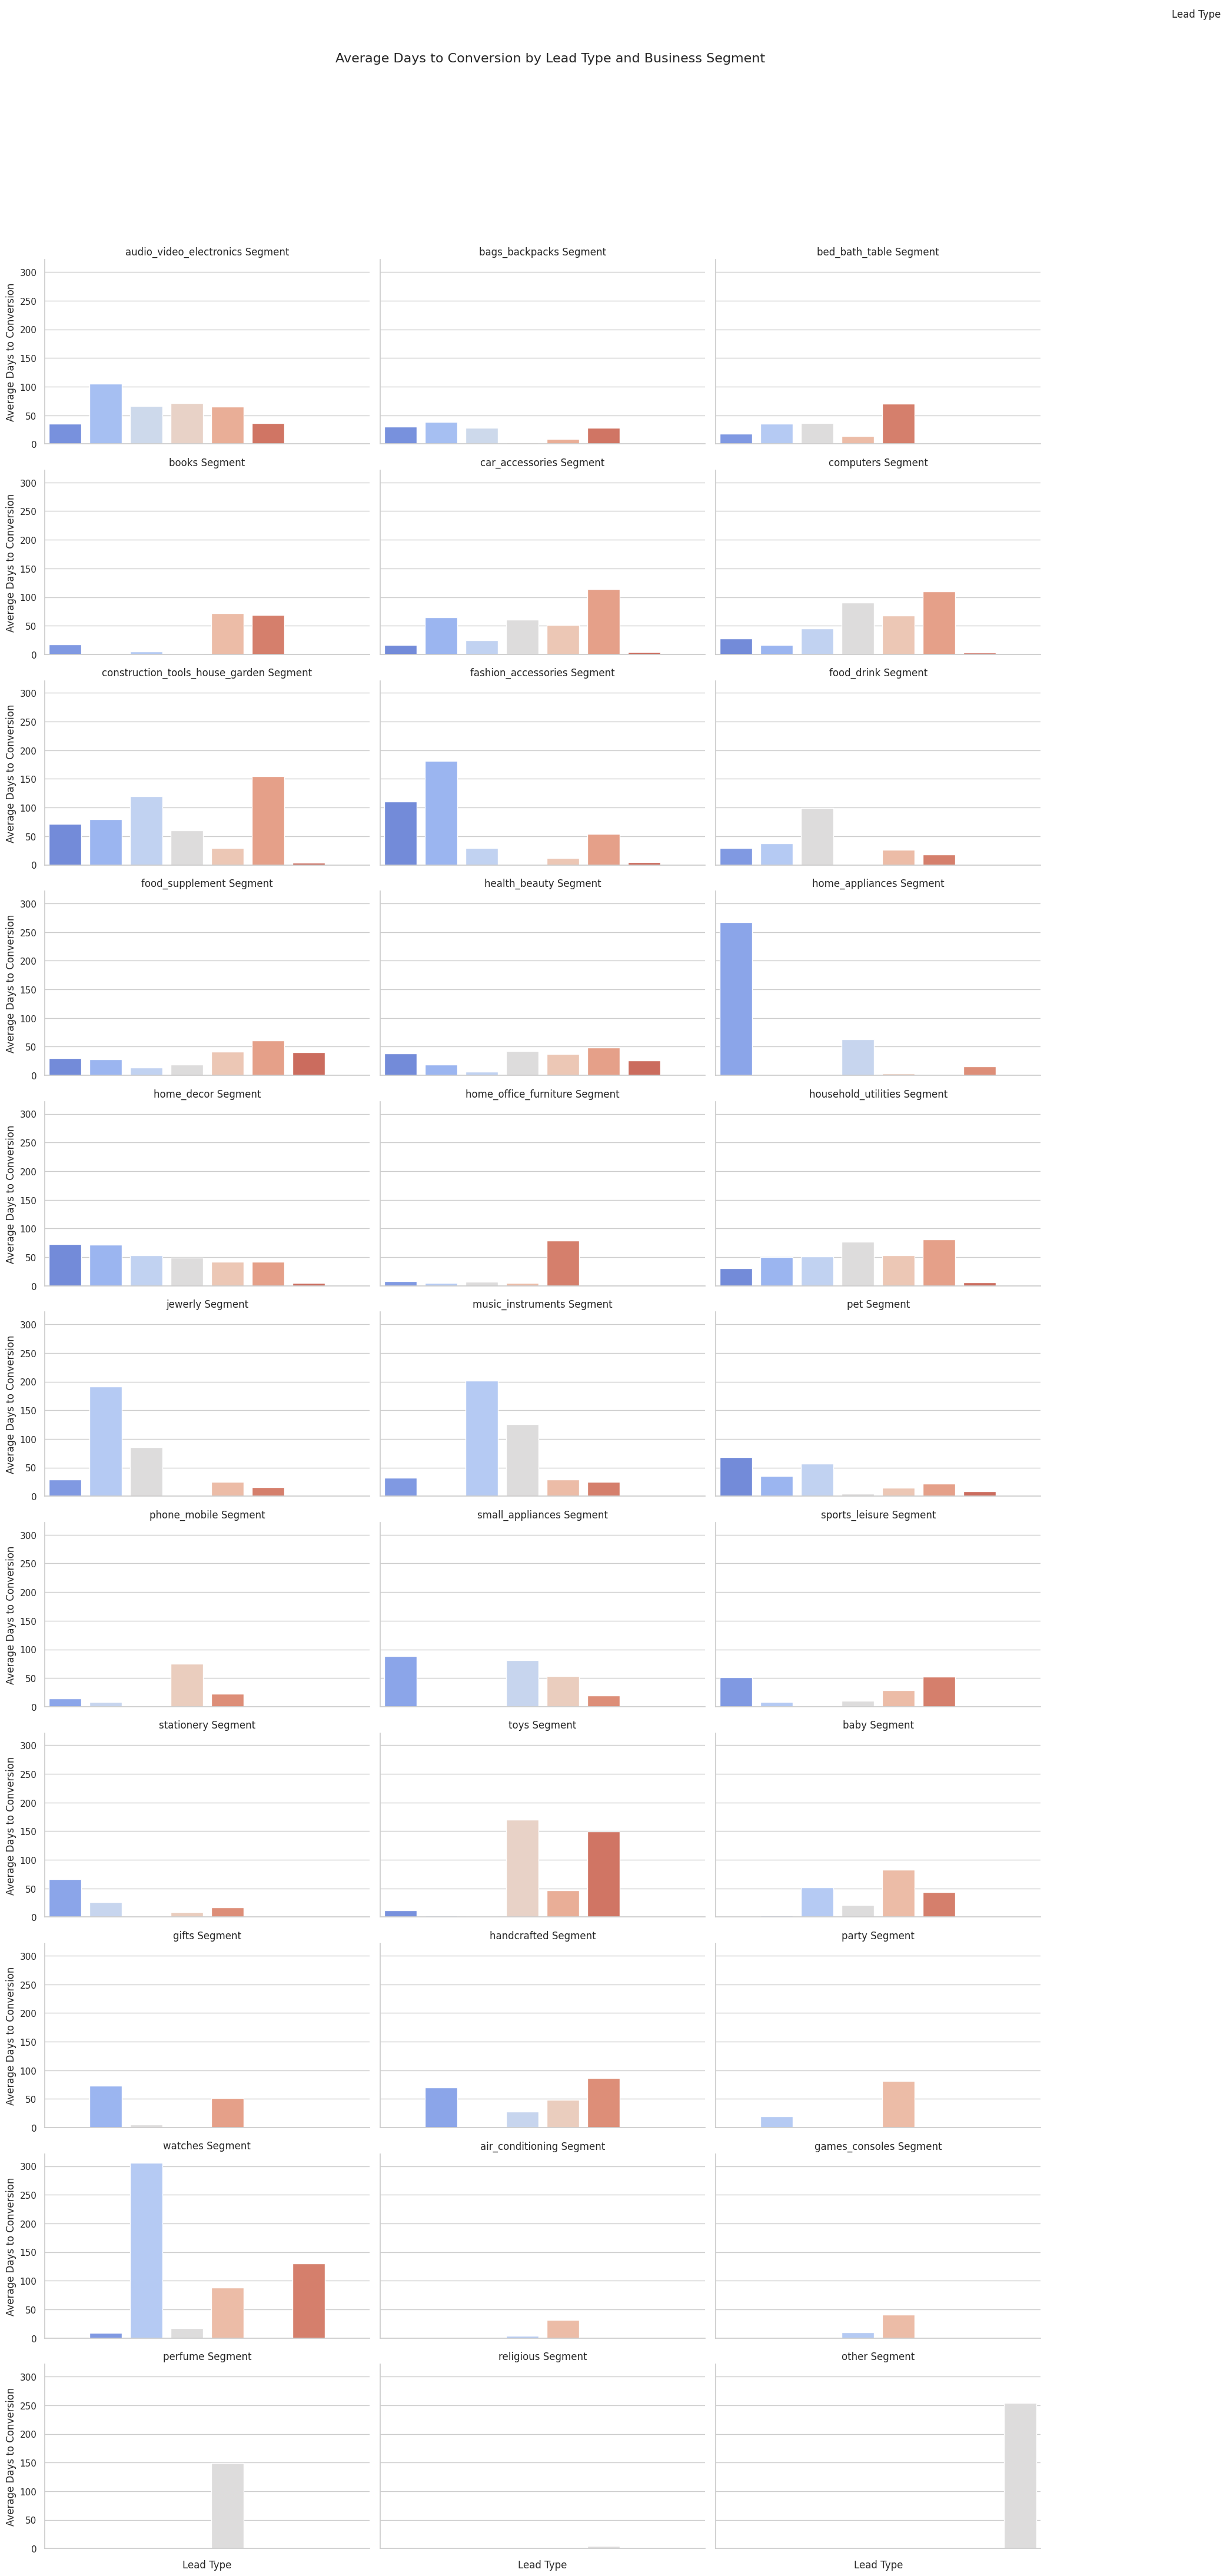

In [17]:
merged_data1['time_to_conversion'] = (merged_data1['won_date'] - merged_data1['first_contact_date']).dt.days
stage_time_analysis = merged_data1.groupby(['lead_type', 'business_segment'])['time_to_conversion'].mean().reset_index()
stage_time_analysis.rename(columns={'time_to_conversion': 'avg_days_to_conversion'}, inplace=True)
g = sns.FacetGrid(stage_time_analysis, col='business_segment', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='lead_type', y='avg_days_to_conversion', hue='lead_type', palette='coolwarm')
g.set_titles("{col_name} Segment")
g.set_axis_labels("Lead Type", "Average Days to Conversion")
g.set_xticklabels(rotation=45)
g.add_legend(title='Lead Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average Days to Conversion by Lead Type and Business Segment", fontsize=16)
plt.show()


### Distribution of Review Scores by Order Status



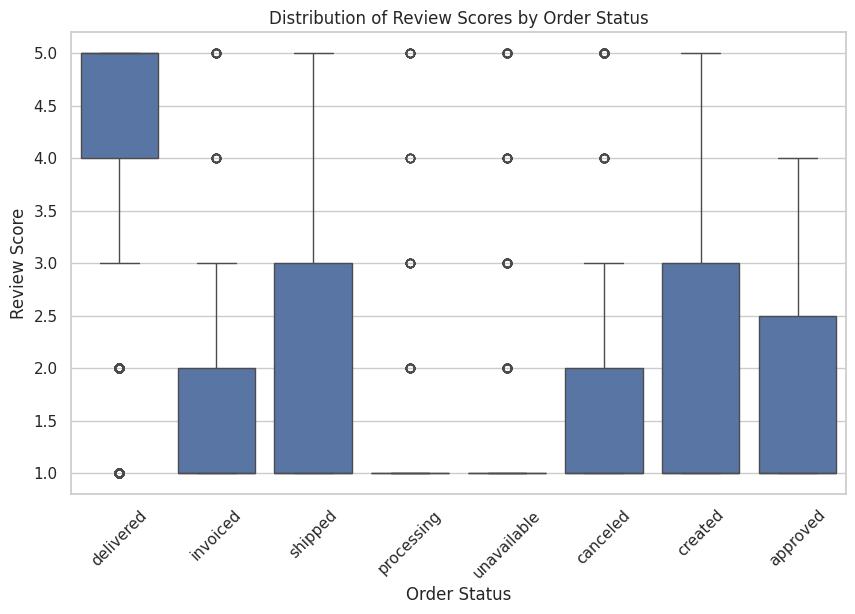

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_status', y='review_score', data=merged_data)  # Corrected column name here
plt.title('Distribution of Review Scores by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Review Score')
plt.xticks(rotation=45)
plt.show()

